<a href="https://colab.research.google.com/github/bd240897/BorisovDA_hw_3/blob/master/%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Олимпиада полу-финал

что то интересное почитать 
https://alexanderdyakonov.files.wordpress.com/2015/04/ama2015_scikit.pdf

Порядок заливаемых ответов 02.03.21:

Номер,   Время,   Тип модели
---
1. 19-19, АдаБуст без всего, 0.57 - ОШИБКА
---
2. 19-29, Тоже самое что и 1 (49073561)
---
3. 20-13, Тоже самое что и 2 только без стоблцов (49075804)
---
4. 20-20, Случайный лес, чистый (49076104)
---
5. 21-47, Голосование 3х алгоримтмов, неправильное обучение на выборке (49080202)
---
6. 21-48, Голосование 3х алгоритмов вытащил алгоритмы а потмо обучил (49080215)





## Импорт библиотек

In [2]:
import csv
import datetime
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

ИДЕИ

1) импортируем данные 
2) Обработаем данные
- отмасштабирем y*100 для более видной MSE
*будем использоват MSE а не RMSE так как она нагляднее и по сути это одно и тоже
3) Иследуем данные
3.1. Количество уникальных значений
3.2. 3д график данных 
3.3. Гитаграмма
3.4. Проверка закономерностей вдоль осей Х и оси У

4) Попробуем методы в ЛОБ
4.1. Логическая регрессия
4.2. Ридж регрессия
4.3. Лассо регресия
4.4. Эластик нет
4.5. Полиномиальная регрессия 

5) Действия усложненные
5.1. Сведем задачу к классификации 
5.1.1. Разделим на 6 классов 
5.1.1.1. # Многоклассовая One-Vs-Rest - с GradBust
5.1.1.2. # Многоклассовая One-Vs-One - с GradBust
5.1.1.3. # Многоклассовая One-Vs-Rest - SVM - работает оч долго, поэтому писал свой
5.1.2. Разделим на 12 классов 

5.2. Попробуем самостоятельно придумать коэфиценты для полинома

5.3. KNN - запоминаниие выборки 

5.4 Попробуем кластаризация для разбивки по значениям в потом уже "полином регрессию"
ПОПРОБОВАТЬ ЭТО!

5.5. Задавать константный алгоритм который возвращает среднее по оси Y за обучающую выборку 
* а если такого нет, то среднюю между соседними линиями 
5.6. Вложенные лагоритмы + голосование
Идея: первй алгоритм определяет линии по У -> номер линии т.е. список по X
Далее по номеру линии 2м класификатором для каждой входной точки определим ниболее вероятную глубину по х
Обучение:
ИДЕЯ: ищем линию наиболее похожую на эту точку.
Если в обучающей Х 0 точек -> такого варианта не должно
Если по Х одна точка - то вернем ее
Если по Х две точки - то вернем ту к которой ближе Х входной точки
Если по Х много точек то заготовим классификатор который по X можем определить значения песчаности 
Т.Е, ВЫБИРЕМ НОМЕР ЛИНИИ Y а затем интарпалирем Х - в случае 2х тоек это прямая  
6) получим результат для ответа

### 1. Импортируем данные

In [5]:
# тренеровочный датасет
df_train = pd.read_csv("Training_wells.csv")
df_train.head(3)

,Well,X,Y,NTG
0,201-907,201,907,0.2006
1,201-914,201,914,0.3624
2,201-924,201,924,0.4381


In [ ]:
# добавим индекс как столбец
df_train['index'] = df_train.index
df_train.head(3)

,Well,X,Y,NTG,index
0,201-907,201,907,0.2006,0
1,201-914,201,914,0.3624,1
2,201-924,201,924,0.4381,2


In [ ]:
# well - номер скважины (координаты х и у)
# X - дублирует ВЕЛЛ
# Y - дублирует ВЕЛЛ
# критерий оценки RMSE

In [6]:
# рабочий датасет
df_work = pd.read_csv("Empty_part.csv")
df_work.head(3)

,Well,X,Y
0,201-901,201,901
1,201-902,201,902
2,201-903,201,903


In [ ]:
df_train

,Well,X,Y,NTG,index
0,201-907,201,907,0.2006,0
1,201-914,201,914,0.3624,1
2,201-924,201,924,0.4381,2
3,202-922,202,922,0.4289,3
4,202-925,202,925,0.4021,4
...,...,...,...,...,...
133,245-908,245,908,0.2719,133
134,245-911,245,911,0.3780,134
135,245-923,245,923,0.4239,135
136,246-905,246,905,0.4900,136


In [ ]:
# разделим на выборку и тест 
x_train = df_train[['X','Y']]
y_train = df_train['Y']
# y_train.size
# x_train.count()
# 138 строки всего???

### Исследуем входные данные 

In [ ]:
pd.DataFrame(df_train['X'].value_counts()).head(3)
pd.DataFrame(df_train['Y'].value_counts()).head(3)
pd.DataFrame(df_train['NTG'].value_counts()).head(3)

,NTG
0.2778,2
0.2766,2
0.3333,2


In [ ]:
# Построим гистаграмму 
  

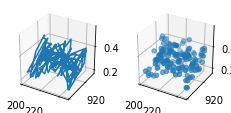

In [64]:
# построим 3д график
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import griddata

x = df_train['X'].to_list()
y = df_train['Y'].to_list()
z = df_train['NTG'].to_list()

x = np.array(x)
y = np.array(y)
z = np.array(z)

fig = plt.figure()
ax = fig.add_subplot(231, projection='3d')
ax.plot(x, y, z, label='parametric curve')

ax = fig.add_subplot(232, projection='3d')
ax.scatter(x, y, z)

### Поищем закономерности в данных

In [ ]:
# посмотри как изменяется уровень по оси X

dict_for_X = dict()
for x in set(df_train['X'].to_list()):
    y = df_train[df_train['X'] == x]['NTG'].to_list()
    
    if dict_for_X.pop(x, -1) == -1:
        dict_for_X[x] = y
    else:
        dict_for_X[x].append(y)
        
dict_for_X
# ВЫВОД: по Х зависимости НЕТ

{201: [0.2006, 0.3624, 0.4381],
 202: [0.4289, 0.4021],
 203: [0.2628, 0.2517, 0.3452],
 204: [0.2092, 0.1974, 0.4136],
 205: [0.3061, 0.3268, 0.3431, 0.3568],
 206: [0.3054, 0.3228, 0.2682],
 207: [0.1897, 0.3249, 0.2659, 0.3205, 0.2963, 0.2637],
 208: [0.3971, 0.2775, 0.3244],
 209: [0.3729],
 210: [0.3801, 0.4419, 0.3869],
 211: [0.4042, 0.3901, 0.3333, 0.3661, 0.3533],
 212: [0.3394, 0.2251, 0.3388],
 214: [0.3769, 0.3484],
 215: [0.3125, 0.3867, 0.3402, 0.25, 0.3512, 0.2918],
 216: [0.3248, 0.2419, 0.3791, 0.4099, 0.2759],
 217: [0.2979, 0.2762],
 218: [0.4562, 0.2865, 0.3721],
 219: [0.4488, 0.4436, 0.3375, 0.2514, 0.2895, 0.2287, 0.3941],
 220: [0.2484],
 221: [0.4369, 0.4],
 222: [0.3857, 0.3557],
 223: [0.3894, 0.2795],
 224: [0.3162, 0.3775],
 225: [0.3471, 0.3081, 0.2386, 0.2794, 0.2961],
 226: [0.2778, 0.3299, 0.3322, 0.429],
 227: [0.3636, 0.2778],
 228: [0.4268, 0.325, 0.4079],
 229: [0.3421, 0.3774, 0.3764],
 230: [0.2562, 0.3074],
 231: [0.3486, 0.3201, 0.3018],
 232: [

In [ ]:
# посмотри как изменяется уровень по оси X

dict_for_Y = dict()
for y in set(df_train['Y'].to_list()):
    x = df_train[df_train['Y'] == y]['NTG'].to_list()
    
    if dict_for_Y.pop(y, -1) == -1:
        dict_for_Y[y] = x
    else:
        dict_for_Y[y].append(x)
        
dict_for_Y
# ВЫВОД: по Y есть какая то слабая зависимость 

{901: [0.4369, 0.4268, 0.3882],
 902: [0.2628, 0.3248, 0.4488, 0.4, 0.3636],
 903: [0.4436, 0.5625, 0.5],
 904: [0.2092, 0.3394, 0.3769, 0.4356],
 905: [0.2251, 0.4562, 0.3894, 0.49],
 906: [0.2517],
 907: [0.2006, 0.1974, 0.1897, 0.3375, 0.3162, 0.3534, 0.3333, 0.177, 0.1786],
 908: [0.2419, 0.3471, 0.325, 0.2562, 0.2719],
 909: [0.2514, 0.2778, 0.2778],
 910: [0.3249, 0.3125, 0.2519, 0.2137, 0.2171],
 911: [0.3061, 0.2766, 0.3566, 0.378],
 912: [0.3054, 0.2659, 0.4079, 0.2463],
 913: [0.3867, 0.2895, 0.3973],
 914: [0.3624, 0.3228, 0.3801, 0.4042, 0.2244],
 915: [0.3971, 0.3857, 0.3775, 0.2874],
 916: [0.3268, 0.3729, 0.4419, 0.3402, 0.3081],
 917: [0.3791, 0.3557, 0.3579],
 918: [0.3484, 0.355],
 919: [0.3205, 0.2775, 0.3901, 0.2381],
 920: [0.4099, 0.3421, 0.3486, 0.2653, 0.2543],
 921: [0.3388, 0.25, 0.2386, 0.3074, 0.2347, 0.2312, 0.2766, 0.2584],
 922: [0.4289, 0.2979, 0.2794, 0.2189, 0.2371],
 923: [0.3431, 0.3869, 0.2484, 0.3670000000000001, 0.4239, 0.3667],
 924: [0.4381, 0.3

In [ ]:
df_train[(df_train['NTG'] < 0.4) & (df_train['NTG'] > 0.2)]

,Well,X,Y,NTG,index
0,201-907,201,907,0.2006,0
1,201-914,201,914,0.3624,1
5,203-902,203,902,0.2628,5
6,203-906,203,906,0.2517,6
7,203-929,203,929,0.3452,7
...,...,...,...,...,...
131,244-923,244,923,0.3670,131
132,244-927,244,927,0.3835,132
133,245-908,245,908,0.2719,133
134,245-911,245,911,0.3780,134


In [ ]:
dict_for_X = dict({1:1})
dict_for_X
df_train[df_train['X'] == 201]['NTG'].to_list()


[0.2006, 0.3624, 0.4381]

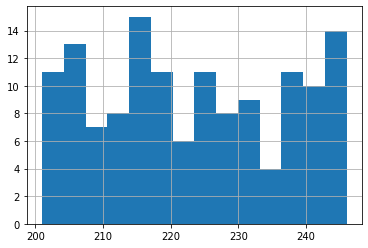

In [60]:
# построим гистограмму входных данных
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

df_train['X'].hist(bins=14)

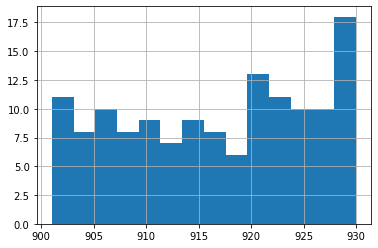

In [61]:
df_train['Y'].hist(bins=14)

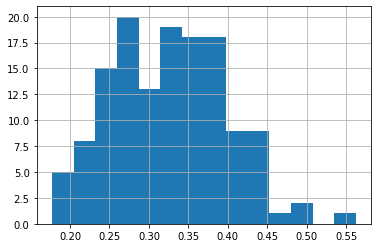

In [63]:
df_train['NTG'].hist(bins=14)

### Train test split

In [65]:
# разделим выборку на тест и обучение 

x_train = df_train[['X','Y']]
y_train = df_train['NTG']
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

In [ ]:
# для читабельности оценок умножим y на 100 
# def multiply_y_100():
# """для читабельности оценок обучение умножим "y" на 100"""
# y_train_split = y_train_split*100
# y_test_split = y_test_split*100

# Сравним несколько простых моделей

### Попробуем разные обработки входных данных

Power Transform

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

x_train_split = pt.fit_transform(x_train_split)
x_test_split = pt.transform(x_test_split)


MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0.0, 1.0))

x_train_split = scaler.fit_transform(x_train_split)
x_test_split = scaler.transform(x_test_split)


RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler

transformer = RobustScaler()

x_train_split = transformer.fit_transform(x_train_split)
x_test_split = transformer.transform(x_test_split)

StandardScaler

In [67]:
from sklearn.preprocessing import StandardScaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

transformer = StandardScaler()

x_train_split = transformer.fit_transform(x_train_split)
x_test_split = transformer.transform(x_test_split)

PolynomialFeatures

In [66]:
poly_reg = PolynomialFeatures(degree=5)
x_train_split  = poly_reg.fit_transform(x_train_split)
x_test_split = poly_reg.fit_transform(x_test_split)

### LinearRegression

In [68]:
# обучим линейную регрессию
def line_regresion():
  """обучим линейную регрессию"""
  est_acc = LinearRegression()
  est_acc.fit(x_train_split, y_train_split)
  y_train_pred = est_acc.predict(x_train_split)
  y_test_pred = est_acc.predict(x_test_split)

  # вывод оценок обучения
  print('MSE train: {:.3f}, test: {:.3f}'.format(
          mean_squared_error(y_train_split, y_train_pred),
          mean_squared_error(y_test_split, y_test_pred)))
  print('R^2 train: {:.3f}, test: {:.3f}'.format(
          r2_score(y_train_split, y_train_pred),
          r2_score(y_test_split, y_test_pred)))
  print('RMSE train: {:.3f}, test: {:.3f}'.format(
          math.sqrt(mean_squared_error(y_train_split, y_train_pred)),
          math.sqrt(mean_squared_error(y_test_split, y_test_pred))))
  
line_regresion()

MSE train: 0.003, test: 0.005
R^2 train: 0.516, test: -0.110
RMSE train: 0.052, test: 0.072


In [ ]:
# разница которую можно увидеть
# np.array(y_train_split.to_list())-y_train_pred

### OrthogonalMatchingPursuit

In [69]:
from sklearn.linear_model import OrthogonalMatchingPursuit

omp = OrthogonalMatchingPursuit(n_nonzero_coefs=2)
omp.fit(x_train_split, y_train_split)

y_train_pred = omp.predict(x_train_split)
y_test_pred = omp.predict(x_test_split)

# вывод оценок обучения
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train_split, y_train_pred),
        mean_squared_error(y_test_split, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train_split, y_train_pred),
        r2_score(y_test_split, y_test_pred)))
print('RMSE train: {:.3f}, test: {:.3f}'.format(
        math.sqrt(mean_squared_error(y_train_split, y_train_pred)),
        math.sqrt(mean_squared_error(y_test_split, y_test_pred))))

MSE train: 0.005, test: 0.005
R^2 train: 0.020, test: -0.020
RMSE train: 0.073, test: 0.069


### SGDRegressor

In [70]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
rng = np.random.RandomState(0)
y = y_train_split
X = x_train_split

reg = make_pipeline(StandardScaler(),
                   SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X, y)
y_train_pred = reg.predict(x_train_split)
y_test_pred = reg.predict(x_test_split)

# вывод оценок обучения
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train_split, y_train_pred),
        mean_squared_error(y_test_split, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train_split, y_train_pred),
        r2_score(y_test_split, y_test_pred)))
print('RMSE train: {:.3f}, test: {:.3f}'.format(
        math.sqrt(mean_squared_error(y_train_split, y_train_pred)),
        math.sqrt(mean_squared_error(y_test_split, y_test_pred))))

MSE train: 0.006, test: 0.006
R^2 train: -0.136, test: -0.258
RMSE train: 0.079, test: 0.076


### BayesianRidge

In [71]:
from sklearn import linear_model

y = y_train_split
X = x_train_split

clf = linear_model.BayesianRidge()
clf.fit(X, y)
y_train_pred = clf.predict(x_train_split)
y_test_pred = clf.predict(x_test_split)

# вывод оценок обучения
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train_split, y_train_pred),
        mean_squared_error(y_test_split, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train_split, y_train_pred),
        r2_score(y_test_split, y_test_pred)))
print('RMSE train: {:.3f}, test: {:.3f}'.format(
        math.sqrt(mean_squared_error(y_train_split, y_train_pred)),
        math.sqrt(mean_squared_error(y_test_split, y_test_pred))))

clf = linear_model.ARDRegression()
clf.fit(X, y)
y_train_pred = clf.predict(x_train_split)
y_test_pred = clf.predict(x_test_split)

# вывод оценок обучения
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train_split, y_train_pred),
        mean_squared_error(y_test_split, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train_split, y_train_pred),
        r2_score(y_test_split, y_test_pred)))
print('RMSE train: {:.3f}, test: {:.3f}'.format(
        math.sqrt(mean_squared_error(y_train_split, y_train_pred)),
        math.sqrt(mean_squared_error(y_test_split, y_test_pred))))

MSE train: 0.005, test: 0.005
R^2 train: 0.014, test: -0.011
RMSE train: 0.074, test: 0.068
MSE train: 0.005, test: 0.005
R^2 train: 0.000, test: -0.007
RMSE train: 0.074, test: 0.068


### AdaBoostRegressor

In [72]:
from sklearn.ensemble import AdaBoostRegressor

regr = AdaBoostRegressor(base_estimator=None, learning_rate=1.6273721018635237,
                  loss='linear', n_estimators=35, random_state=2100)
regr.fit(x_train_split, y_train_split)

y_train_pred = regr.predict(x_train_split)
y_test_pred = regr.predict(x_test_split)

print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y_train_split, y_train_pred),
        mean_absolute_error(y_test_split, y_test_pred)))
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train_split, y_train_pred),
        mean_squared_error(y_test_split, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train_split, y_train_pred),
        r2_score(y_test_split, y_test_pred)))
print('RMSE train: {:.3f}, test: {:.3f}'.format(
        math.sqrt(mean_squared_error(y_train_split, y_train_pred)),
        math.sqrt(mean_squared_error(y_test_split, y_test_pred))))

IndentationError: ignored

### Голосование алгоритмо

In [ ]:
# голосование версия - 1 - два алгоритма

In [41]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from hpsklearn import ada_boost_regression
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from hpsklearn import HyperoptEstimator
from hpsklearn import any_regressor
from hpsklearn import any_preprocessing
from hyperopt import tpe
from hpsklearn import HyperoptEstimator, xgboost_regression, random_forest_regression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# разделим выборку на тест и обучение 
score = []

for i in range(5,6):
  x_train = df_train[['X','Y']]
  y_train = df_train['NTG']
  x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

  poly_reg = PolynomialFeatures(degree=i)
  x_train_split  = poly_reg.fit_transform(x_train_split)
  x_test_split = poly_reg.fit_transform(x_test_split)

  scaler = MinMaxScaler(feature_range=(0.0, 1.0))
  x_train_split = scaler.fit_transform(x_train_split)
  x_test_split = scaler.transform(x_test_split)

  regr = AdaBoostRegressor(base_estimator=None, learning_rate=1.6273721018635237,
                    loss='linear', n_estimators=35, random_state=2100)
  regr.fit(x_train_split, y_train_split)

  y_train_pred = regr.predict(x_train_split)
  y_test_pred = regr.predict(x_test_split)

  ################################3
  model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                        max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=2,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=250, n_jobs=None, oob_score=False,
                        random_state=30, verbose=0, warm_start=False)

  model.fit(x_train_split, y_train_split)
  y_train_pred_2 = model.predict(x_train_split)
  y_test_pred_2 = model.predict(x_test_split)

  al = 0.5
  # y_train_pred = (al*y_train_pred + (1-al)*y_train_pred_2)
  # y_test_pred = (al*y_test_pred + (1-al)*y_test_pred_2)
  ###################################
  estim = HyperoptEstimator(regressor=ada_boost_regression('my_gb'),
                          max_evals=10, trial_timeout=10, seed=39,
                          loss_fn=mean_squared_error)

  estim.fit(x_train_split, y_train_split)
  y_train_pred_3 = estim.predict(x_train_split)
  y_test_pred_3 = estim.predict(x_test_split)


  A = 0.5
  B = 0.25
  C = 1 - A - B
  y_train_pred = A*y_train_pred + + B*y_train_pred_2 + C*y_train_pred_3
  y_test_pred = A*y_test_pred + B*y_test_pred_2 + C*y_test_pred_3


  print('MAE train: {:.3f}, test: {:.3f}'.format(
          mean_absolute_error(y_train_split, y_train_pred),
          mean_absolute_error(y_test_split, y_test_pred)))
  print('MSE train: {:.3f}, test: {:.3f}'.format(
          mean_squared_error(y_train_split, y_train_pred),
          mean_squared_error(y_test_split, y_test_pred)))
  print('R^2 train: {:.3f}, test: {:.3f}'.format(
          r2_score(y_train_split, y_train_pred),
          r2_score(y_test_split, y_test_pred)))
  print('RMSE train: {:.3f}, test: {:.3f}'.format(
          math.sqrt(mean_squared_error(y_train_split, y_train_pred)),
          math.sqrt(mean_squared_error(y_test_split, y_test_pred))))
  print('Cтепень равняется ', i)
  print('######################################')  


100%|██████████| 1/1 [00:00<00:00, 12.45it/s, best loss: 0.00267824472350862]
MAE train: 0.032, test: 0.049
MSE train: 0.001, test: 0.003
R^2 train: 0.742, test: 0.309
RMSE train: 0.038, test: 0.056
Cтепень равняется  5
######################################




Голосование алгоритмов версия 2


In [ ]:
# Голосование алгоритмов версия 2 - три алгоритма

In [42]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from hpsklearn import ada_boost_regression, extra_trees_regression, svr_poly, \
svr, svr_linear, svr_rbf, svr_poly, svr_sigmoid, knn_regression, sgd_regression, gradient_boosting_regression, \
random_forest_regression, extra_trees_regression, sgd_regression, xgboost_regression
from sklearn.metrics import max_error, mean_squared_log_error


# разделим выборку на тест и обучение 
score = []

for i in range(5,6):
  x_train = df_train[['X','Y']]
  y_train = df_train['NTG']
  x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

  poly_reg = PolynomialFeatures(degree=i)
  x_train_split  = poly_reg.fit_transform(x_train_split)
  x_test_split = poly_reg.fit_transform(x_test_split)

  scaler = MinMaxScaler(feature_range=(0.0, 1.0))
  x_train_split = scaler.fit_transform(x_train_split)
  x_test_split = scaler.transform(x_test_split)

  regr = AdaBoostRegressor(base_estimator=None, learning_rate=1.6273721018635237,
                    loss='linear', n_estimators=35, random_state=2100)
  regr.fit(x_train_split, y_train_split)

  y_train_pred = regr.predict(x_train_split)
  y_test_pred = regr.predict(x_test_split)

  ################################3
  model = estim = HyperoptEstimator(regressor=svr_linear('my_gb'),
                          max_evals=10, trial_timeout=10, seed=39,
                          loss_fn=mean_squared_error)

  model.fit(x_train_split, y_train_split)
  y_train_pred_2 = model.predict(x_train_split)
  y_test_pred_2 = model.predict(x_test_split)

  al = 0.5
  # y_train_pred = (al*y_train_pred + (1-al)*y_train_pred_2)
  # y_test_pred = (al*y_test_pred + (1-al)*y_test_pred_2)
  ###################################
  estim = HyperoptEstimator(regressor=ada_boost_regression('my_gb'),
                          max_evals=10, trial_timeout=10, seed=39,
                          loss_fn=mean_squared_error)

  estim.fit(x_train_split, y_train_split)
  y_train_pred_3 = estim.predict(x_train_split)
  y_test_pred_3 = estim.predict(x_test_split)


  A = 0.3
  B = 0.3
  C = 1 - A - B
  y_train_pred = A*y_train_pred + + B*y_train_pred_2 + C*y_train_pred_3
  y_test_pred = A*y_test_pred + B*y_test_pred_2 + C*y_test_pred_3


  print('MAE train: {:.3f}, test: {:.3f}'.format(
          mean_absolute_error(y_train_split, y_train_pred),
          mean_absolute_error(y_test_split, y_test_pred)))
  print('MSE train: {:.3f}, test: {:.3f}'.format(
          mean_squared_error(y_train_split, y_train_pred),
          mean_squared_error(y_test_split, y_test_pred)))
  print('R^2 train: {:.3f}, test: {:.3f}'.format(
          r2_score(y_train_split, y_train_pred),
          r2_score(y_test_split, y_test_pred)))
  print('RMSE train: {:.3f}, test: {:.3f}'.format(
          math.sqrt(mean_squared_error(y_train_split, y_train_pred)),
          math.sqrt(mean_squared_error(y_test_split, y_test_pred))))
  print('Cтепень равняется ', i)
  print('######################################')  


100%|██████████| 1/1 [00:00<00:00, 12.54it/s, best loss: 0.00267824472350862]
MAE train: 0.040, test: 0.048
MSE train: 0.002, test: 0.003
R^2 train: 0.606, test: 0.341
RMSE train: 0.047, test: 0.055
Cтепень равняется  5
######################################


In [56]:
# Вытащим сами алгоритмы
print(model.best_model()['learner'])
print(estim.best_model()['learner'])

SVR(C=0.00011055634849084026, cache_size=512, coef0=0.0, degree=1,
    epsilon=0.001115347080173807, gamma='auto', kernel='linear',
    max_iter=170274026.0, shrinking=False, tol=0.0002988612959169446,
    verbose=False)
AdaBoostRegressor(base_estimator=None, learning_rate=0.19877223857045706,
                  loss='square', n_estimators=285, random_state=3)


Попытка обучиться по ошибке 1го обучения - не дела результатов

In [103]:


x_train = df_train[['X','Y']]
y_train = df_train['NTG']
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

poly_reg = PolynomialFeatures(degree=5)
x_train_split  = poly_reg.fit_transform(x_train_split)
x_test_split = poly_reg.fit_transform(x_test_split)

scaler = MinMaxScaler(feature_range=(0.0, 1.0))
x_train_split = scaler.fit_transform(x_train_split)
x_test_split = scaler.transform(x_test_split)

regr = AdaBoostRegressor(base_estimator=None, learning_rate=1.6273721018635237,
                  loss='linear', n_estimators=35, random_state=2100)

# model = SVR(C=0.00011055634849084026, cache_size=512, coef0=0.0, degree=1,
#     epsilon=0.001115347080173807, gamma='auto', kernel='linear',
#     max_iter=170274026.0, shrinking=False, tol=0.0002988612959169446,
#     verbose=False)

regr.fit(x_train_split, y_train_split)

y_train_pred_1 = regr.predict(x_train_split)

########################################33
y_MIDLE = y_train_split - y_train_pred
model = HyperoptEstimator(regressor=ada_boost_regression('reg'), preprocessing=any_preprocessing('pre'), algo=tpe.suggest, max_evals=20, trial_timeout=30)
model.fit(x_train_split, y_MIDLE)

y_train_pred_2 = model.predict(x_train_split)
# y_train_pred = y_train_pred + model.predict(x_train_split)
# y_test_pred = regr.predict(x_test_split) +  model.predict(x_test_split)

########################################33
y_MIDLE_2 = y_train_split - y_train_pred_1 - y_train_pred_2
est = HyperoptEstimator(regressor=svr_linear('reg'), preprocessing=any_preprocessing('pre'), algo=tpe.suggest, max_evals=20, trial_timeout=30)
est.fit(x_train_split, y_MIDLE_2)

y_train_pred = regr.predict(x_train_split) + model.predict(x_train_split) + est.predict(x_train_split)
y_test_pred = regr.predict(x_test_split) +  model.predict(x_test_split) + est.predict(x_test_split)


print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y_train_split, y_train_pred),
        mean_absolute_error(y_test_split, y_test_pred)))
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train_split, y_train_pred),
        mean_squared_error(y_test_split, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train_split, y_train_pred),
        r2_score(y_test_split, y_test_pred)))
print('RMSE train: {:.3f}, test: {:.3f}'.format(
        math.sqrt(mean_squared_error(y_train_split, y_train_pred)),
        math.sqrt(mean_squared_error(y_test_split, y_test_pred))))




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=21, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
100%|██████████| 1/1 [00:00<00:00, 21.44it/s, best loss: 0.7735810637346072]
MAE train: 0.033, test: 0.051
MSE train: 0.002, test: 0.003
R^2 train: 0.725, test: 0.249
RMSE train: 0.039, test: 0.059


### *KNeighborsRegressor*

In [73]:
from sklearn.neighbors import KNeighborsRegressor
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html?highlight=kneighborsregressor#sklearn.neighbors.KNeighborsRegressor

regr = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='chebyshev',
                    metric_params=None, n_jobs=1, n_neighbors=2, p=0,
                    weights='uniform')

regr.fit(x_train_split, y_train_split)

y_train_pred = regr.predict(x_train_split)
y_test_pred = regr.predict(x_test_split)

print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y_train_split, y_train_pred),
        mean_absolute_error(y_test_split, y_test_pred)))
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train_split, y_train_pred),
        mean_squared_error(y_test_split, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train_split, y_train_pred),
        r2_score(y_test_split, y_test_pred)))
print('RMSE train: {:.3f}, test: {:.3f}'.format(
        math.sqrt(mean_squared_error(y_train_split, y_train_pred)),
        math.sqrt(mean_squared_error(y_test_split, y_test_pred))))

MAE train: 0.030, test: 0.048
MSE train: 0.001, test: 0.004
R^2 train: 0.730, test: 0.177
RMSE train: 0.038, test: 0.062


### Lasso

In [74]:
def lasso_regresion():
  """Обучим лассо регрессию"""
  lasso = Lasso(alpha=0.1)
  lasso.fit(x_train_split, y_train_split)
  y_train_pred = lasso.predict(x_train_split)
  y_test_pred = lasso.predict(x_test_split)

  # вывод оценок обучения
  print('MAE train: {:.3f}, test: {:.3f}'.format(
          mean_absolute_error(y_train_split, y_train_pred),
          mean_absolute_error(y_test_split, y_test_pred)))
  print('MSE train: {:.3f}, test: {:.3f}'.format(
          mean_squared_error(y_train_split, y_train_pred),
          mean_squared_error(y_test_split, y_test_pred)))
  print('R^2 train: {:.3f}, test: {:.3f}'.format(
          r2_score(y_train_split, y_train_pred),
          r2_score(y_test_split, y_test_pred)))
  print('RMSE train: {:.3f}, test: {:.3f}'.format(
          math.sqrt(mean_squared_error(y_train_split, y_train_pred)),
          math.sqrt(mean_squared_error(y_test_split, y_test_pred))))
  
lasso_regresion()

MAE train: 0.062, test: 0.055
MSE train: 0.005, test: 0.005
R^2 train: 0.000, test: -0.007
RMSE train: 0.074, test: 0.068


### ElasticNet¶

In [75]:
def Elastic_regresion():

  est_acc = ElasticNet()
  est_acc.fit(x_train_split, y_train_split)
  y_train_pred = est_acc.predict(x_train_split)
  y_test_pred = est_acc.predict(x_test_split)

  print('MSE train: {:.3f}, test: {:.3f}'.format(
          mean_squared_error(y_train_split, y_train_pred),
          mean_squared_error(y_test_split, y_test_pred)))
  print('R^2 train: {:.3f}, test: {:.3f}'.format(
          r2_score(y_train_split, y_train_pred),
          r2_score(y_test_split, y_test_pred)))
  print('RMSE train: {:.3f}, test: {:.3f}'.format(
          math.sqrt(mean_squared_error(y_train_split, y_train_pred)),
          math.sqrt(mean_squared_error(y_test_split, y_test_pred))))
  
Elastic_regresion()

MSE train: 0.005, test: 0.005
R^2 train: 0.000, test: -0.007
RMSE train: 0.074, test: 0.068


In [76]:
# from sklearn.metrics import make_scorer

# def Elastic_regresion_GRID():
#   parametersGrid = {"max_iter": [500],
#                     "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
#                     "l1_ratio": np.arange(0.0, 1.0, 0.1)}

#   def RMSE(y_true, y_pred):
#       return math.sqrt(mean_squared_error(y_true, y_pred))
#   def RMSE_2():
#     return make_scorer(RMSE, greater_is_better=False)

#   # поиск по сетке
#   eNet = ElasticNet()
#   grid = GridSearchCV(eNet, parametersGrid, scoring=RMSE_2(), cv=10)
#   grid.fit(df_train[['X','Y']], df_train['NTG']*100)
#   print(grid.best_score_)
#   print(grid.best_estimator_)

# Elastic_regresion_GRID()

### Ridge

In [77]:
def ridge_regresion():
  
  ridge = Ridge(alpha=0.1)
  ridge.fit(x_train_split, y_train_split)
  y_train_pred = ridge.predict(x_train_split)
  y_test_pred = ridge.predict(x_test_split)

  print('MAE train: {:.3f}, test: {:.3f}'.format(
          mean_absolute_error(y_train_split, y_train_pred),
          mean_absolute_error(y_test_split, y_test_pred)))
  print('MSE train: {:.3f}, test: {:.3f}'.format(
          mean_squared_error(y_train_split, y_train_pred),
          mean_squared_error(y_test_split, y_test_pred)))
  print('R^2 train: {:.3f}, test: {:.3f}'.format(
          r2_score(y_train_split, y_train_pred),
          r2_score(y_test_split, y_test_pred)))
  print('RMSE train: {:.3f}, test: {:.3f}'.format(
          math.sqrt(mean_squared_error(y_train_split, y_train_pred)),
          math.sqrt(mean_squared_error(y_test_split, y_test_pred))))
  
ridge_regresion()

MAE train: 0.060, test: 0.053
MSE train: 0.005, test: 0.004
R^2 train: 0.066, test: 0.028
RMSE train: 0.072, test: 0.067


### Полиномиальная регерссия


In [ ]:
# взял из https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html


def polinom_regresion():

  poly_reg = PolynomialFeatures(degree=4, interaction_only = True, include_bias = True)
  X_poly_train = poly_reg.fit_transform(x_train_split)
  X_poly_test = poly_reg.fit_transform(x_test_split)

  pol_reg = LinearRegression()

  pol_reg.fit(X_poly_train, y_train_split)
  y_train_pred = pol_reg.predict(X_poly_train)
  y_test_pred = pol_reg.predict(X_poly_test)

  print('MAE train: {:.3f}, test: {:.3f}'.format(
          mean_absolute_error(y_train_split, y_train_pred),
          mean_absolute_error(y_test_split, y_test_pred)))
  print('MSE train: {:.3f}, test: {:.3f}'.format(
          mean_squared_error(y_train_split, y_train_pred),
          mean_squared_error(y_test_split, y_test_pred)))
  print('R^2 train: {:.3f}, test: {:.3f}'.format(
          r2_score(y_train_split, y_train_pred),
          r2_score(y_test_split, y_test_pred)))
  print('RMSE train: {:.3f}, test: {:.3f}'.format(
          math.sqrt(mean_squared_error(y_train_split, y_train_pred)),
          math.sqrt(mean_squared_error(y_test_split, y_test_pred))))

polinom_regresion()

MAE train: 0.059, test: 0.052
MSE train: 0.005, test: 0.004
R^2 train: 0.065, test: 0.064
RMSE train: 0.072, test: 0.066


### Полиномиальнаяр регерссия по сетке

In [ ]:
p_degree = range(1,20)
p_interaction_only = [True, False]
p_include_bias = [True, False]

list_acc_score = []
list_degree = [] 
list_interaction_only = []
list_include_bias = []

for degree in p_degree:
    for interaction_only in p_interaction_only:
        for include_bias in p_include_bias:
              
              list_degree.append(degree)
              list_interaction_only.append(interaction_only)
              list_include_bias.append(include_bias)

              # define model
              poly_reg = PolynomialFeatures(degree=degree, 
                                            interaction_only = interaction_only, include_bias = include_bias)
              X_poly_train = poly_reg.fit_transform(x_train_split)
              X_poly_test = poly_reg.fit_transform(x_test_split)

              pol_reg = LinearRegression()
              pol_reg.fit(X_poly_train, y_train_split)
              
              y_train_pred = pol_reg.predict(X_poly_train)
              y_test_pred = pol_reg.predict(X_poly_test)


              # #   проверка качества по кросс валедации
              acc = math.sqrt(mean_squared_error(y_test_split, y_test_pred))

              list_acc_score.append(acc)


acc_score = pd.DataFrame()
acc_score["acc_scire"] = list_acc_score        
acc_score["degree"] = list_degree     
acc_score["interaction_only"] = list_interaction_only
acc_score["include_bias"] = list_include_bias

acc_score.sort_values(by = 'acc_scire', ascending = True)

### Случайный лес классификатор

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse, accuracy_score

# взял из https://habr.com/ru/post/533470/

model = RandomForestRegressor(random_state=42, max_depth=20)
model.fit(x_train_split, y_train_split)

y_train_pred = model.predict(x_train_split)
y_test_pred = model.predict(x_test_split)

print('MSE train: {:.3f}, test: {:.3f}'.format(
      mean_squared_error(y_train_split, y_train_pred),
      mean_squared_error(y_test_split, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
      r2_score(y_train_split, y_train_pred),
      r2_score(y_test_split, y_test_pred)))
print('RMSE train: {:.3f}, test: {:.3f}'.format(
      math.sqrt(mean_squared_error(y_train_split, y_train_pred)),
      math.sqrt(mean_squared_error(y_test_split, y_test_pred))))


MSE train: 0.000, test: 0.004
R^2 train: 0.918, test: 0.148
RMSE train: 0.021, test: 0.063


### Cлуйчайный лес по сетке

In [79]:
model = RandomForestRegressor(random_state=30)
param_grid = { "n_estimators" : [250, 300],
           "criterion" : ["mse", "mae"],
           "max_features" : ["auto", "sqrt", "log2"],
           "max_depth" : [10, 20],
           "min_samples_split" : [2, 4] ,
           "min_samples_leaf" : [1,2,3,5] 
            }

grid_search = GridSearchCV(model, param_grid, scoring = 'neg_mean_squared_error', n_jobs=-1, cv=2)
grid_search.fit(df_train[['X','Y']], df_train['NTG'])

print(grid_search.best_params_)

{'criterion': 'mae', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 250}


In [80]:
print(grid_search.best_score_)

-0.004765869042704049


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# разделим выборку на тест и обучение 

x_train = df_train[['X','Y']]
y_train = df_train['NTG']
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

poly_reg = PolynomialFeatures(degree=2)
x_train_split  = poly_reg.fit_transform(x_train_split)
x_test_split = poly_reg.fit_transform(x_test_split)

scaler = MinMaxScaler(feature_range=(0, 1))
x_train_split = scaler.fit_transform(x_train_split)
x_test_split = scaler.transform(x_test_split)


model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=30, verbose=0, warm_start=False)

model.fit(x_train_split,y_train_split)

y_train_pred = model.predict(x_train_split)
y_test_pred = model.predict(x_test_split)

print('MSE train: {:.3f}, test: {:.3f}'.format(
      mean_squared_error(y_train_split, y_train_pred),
      mean_squared_error(y_test_split, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
      r2_score(y_train_split, y_train_pred),
      r2_score(y_test_split, y_test_pred)))
print('RMSE train: {:.3f}, test: {:.3f}'.format(
      math.sqrt(mean_squared_error(y_train_split, y_train_pred)),
      math.sqrt(mean_squared_error(y_test_split, y_test_pred))))


MSE train: 0.001, test: 0.003
R^2 train: 0.758, test: 0.277
RMSE train: 0.036, test: 0.058


In [ ]:
grid_search.best_score_

-0.004765869042704049

### ЗАМЕТКА - метрики скайлерн

https://scikit-learn.org/stable/modules/grid_search.html#multimetric-grid-search

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

https://scikit-learn.org/stable/modules/model_evaluation.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

### hpsklearn 

In [ ]:
!pip install hyperopt

In [3]:
# !pip install hpsklearn
!pip install git+https://github.com/hyperopt/hyperopt-sklearn.git
# взял из https://github.com/hyperopt/hyperopt-sklearn/issues/133

  Cloning https://github.com/hyperopt/hyperopt-sklearn.git to /tmp/pip-req-build-_nqknpap
  Running command git clone -q https://github.com/hyperopt/hyperopt-sklearn.git /tmp/pip-req-build-_nqknpap
  Created wheel for hpsklearn: filename=hpsklearn-0.0.3-cp37-none-any.whl size=26924 sha256=edfaa4435fcb50c372c8558c4edd1d8f3092cfcf6f272b04858bd1d52d27bb20
  Stored in directory: /tmp/pip-ephem-wheel-cache-o58j1emh/wheels/28/93/20/67dca95c2aaa13466b4900ba79a7bab66022e50ce44f8a438d
Successfully built hpsklearn


https://machinelearningmastery.com/hyperopt-for-automated-machine-learning-with-scikit-learn/

http://hyperopt.github.io/hyperopt-sklearn/

In [ ]:
  y_train_pred = model.predict(x_train_split)
  y_test_pred = model.predict(x_test_split)

  print('MSE train: {:.3f}, test: {:.3f}'.format(
          mean_squared_error(y_train_split, y_train_pred),
          mean_squared_error(y_test_split, y_test_pred)))
  print('R^2 train: {:.3f}, test: {:.3f}'.format(
          r2_score(y_train_split, y_train_pred),
          r2_score(y_test_split, y_test_pred)))
  print('RMSE train: {:.3f}, test: {:.3f}'.format(
          math.sqrt(mean_squared_error(y_train_split, y_train_pred)),
          math.sqrt(mean_squared_error(y_test_split, y_test_pred))))

MSE train: 0.001, test: 0.003
R^2 train: 0.763, test: 0.283
RMSE train: 0.036, test: 0.058


In [ ]:


# example of hyperopt-sklearn for the housing regression dataset

# https://laptrinhx.com/hyperopt-for-automated-machine-learning-with-scikit-learn-1421923572/

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from hpsklearn import HyperoptEstimator
from hpsklearn import any_regressor
from hpsklearn import any_preprocessing
from hyperopt import tpe

# define search
model = HyperoptEstimator(regressor=any_regressor('reg'), preprocessing=any_preprocessing('pre'), loss_fn=mean_squared_error, algo=tpe.suggest, max_evals=100, trial_timeout=90)
# perform the search

# model.fit(x_train_split.values.astype('float32'), y_train_split.values.astype('float32'))
model.fit(x_train_split.astype('float32'), y_train_split.astype('float32'))
# summarize performance
mae = model.score(x_test_split, y_test_split)
print("MAE: %.3f" % mae)
# summarize the best model
print(model.best_model())

100%|██████████| 1/1 [00:00<00:00,  9.99it/s, best loss: 0.0035636307891779924]
[12:02:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  3.28it/s, best loss: 0.0035636307891779924]
[12:02:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  4.98it/s, best loss: 0.0021230373711925237]
[12:03:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  5.56it/s, best loss: 0.0021230373711925237]
[12:03:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  3.20it/s, best loss: 0.0021230373711925237]
[12:03:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprec

{'learner': AdaBoostRegressor(base_estimator=None, learning_rate=1.6273721018635237,
                  loss='linear', n_estimators=35, random_state=2), 'preprocs': (MinMaxScaler(copy=True, feature_range=(0.0, 1.0)),), 'ex_preprocs': ()}


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

In [ ]:
print(math.sqrt(mean_squared_error(y_test_split, estim.predict(x_test_split))))

0.06528064105336184


*HyperoptEstimator* + xgboost_regression

In [ ]:
from hpsklearn import HyperoptEstimator, xgboost_regression, random_forest_regression
# # https://www.kaggle.com/ilialar/hyperparameters-tunning-with-hyperopt

estim = HyperoptEstimator(regressor=xgboost_regression('my_gb'), max_evals=200, trial_timeout=50, seed=39)

estim.fit(x_train_split, y_train_split)

print(mean_squared_error(y_test_split, estim.predict(x_test_split)))
print(math.sqrt(mean_squared_error(y_test_split, estim.predict(x_test_split))))

[17:01:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  4.90it/s, best loss: 1.1157454718575508]
[17:01:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00, 12.05it/s, best loss: 1.1157454718575508]
[17:01:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  8.37it/s, best loss: 0.7078892611203441]
[17:01:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  5.39it/s, best loss: 0.7078892611203441]
[17:01:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  7.62it/s, best loss: 

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
100%|██████████| 1/1 [00:00<00:00, 13.04it/s, best loss: 0.414389483524761]
[17:01:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  3.62it/s, best loss: 0.414389483524761]
[17:01:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  9.54it/s, best loss: 0.414389483524761]
[17:01:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  3.34it/s, best loss: 0.414389483524761]
[17:01:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  9.51it

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
100%|██████████| 1/1 [00:00<00:00, 12.36it/s, best loss: 0.414389483524761]
[17:01:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  3.41it/s, best loss: 0.414389483524761]
[17:01:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  7.43it/s, best loss: 0.414389483524761]
[17:01:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  3.89it/s, best loss: 0.414389483524761]
[17:01:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
  0%|          | 0/1 [00:00<?, ?it/s, best

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
100%|██████████| 1/1 [00:00<00:00, 11.68it/s, best loss: 0.414389483524761]
[17:01:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00, 11.38it/s, best loss: 0.414389483524761]
[17:01:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
100%|██████████| 1/1 [00:00<00:00, 11.72it/s, best loss: 0.414389483524761]
[17:01:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00, 10.65it/s, best loss: 0.414389483524761]
[17:01:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  5.96it/s, best loss: 0.414389483524761]
[17:01:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  6.26it/s, best loss: 0.414389483524761]
[17:01:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  5.87it

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
100%|██████████| 1/1 [00:00<00:00, 12.86it/s, best loss: 0.414389483524761]
[17:01:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  4.30it/s, best loss: 0.414389483524761]
[17:01:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  3.18it/s, best loss: 0.414389483524761]
[17:01:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  9.02it/s, best loss: 0.414389483524761]
[17:01:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  3.81it

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
100%|██████████| 1/1 [00:00<00:00, 11.78it/s, best loss: 0.4045300340032434]
[17:01:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  4.48it/s, best loss: 0.4045300340032434]
[17:01:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
100%|██████████| 1/1 [00:00<00:00, 12.44it/s, best loss: 0.4045300340032434]
[17:01:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  3.31it/s, best loss: 0.4045300340032434]
[17:01:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  2.31it/s, best loss: 0.4045300340032434]
[17:01:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  3.05it/s, best loss: 0.4045300340032434]
[17:01:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  8.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
100%|██████████| 1/1 [00:00<00:00, 11.04it/s, best loss: 0.3633865835461729]
[17:01:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  4.84it/s, best loss: 0.3633865835461729]
[17:01:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
100%|██████████| 1/1 [00:00<00:00, 11.12it/s, best loss: 0.3633865835461729]
[17:01:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  4.81it/s, best loss: 0.3633865835461729]
[17:01:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  4.05it/s, best loss: 0.3633865835461729]
[17:01:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  5.10it/s, best loss: 0.3633865835461729]
[17:01:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  5.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
100%|██████████| 1/1 [00:00<00:00, 14.61it/s, best loss: 0.3633865835461729]
[17:01:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  5.29it/s, best loss: 0.3633865835461729]
[17:01:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  3.20it/s, best loss: 0.3633865835461729]
[17:01:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  9.18it/s, best loss: 0.3633865835461729]
[17:01:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  3.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
100%|██████████| 1/1 [00:00<00:00, 11.18it/s, best loss: 0.34607049660810274]
[17:01:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  4.93it/s, best loss: 0.34607049660810274]
[17:01:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  4.83it/s, best loss: 0.34607049660810274]
[17:01:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  4.24it/s, best loss: 0.34607049660810274]
[17:01:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
100%|██████████| 1/1 [00:00<00:00, 12.40it/s, best loss: 0.34607049660810274]
[17:01:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  2.70it/s, best loss: 0.34607049660810274]
[17:01:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  8.93it/s, best loss: 0.34607049660810274]
[17:01:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  3.65it/s, best loss: 0.34607049660810274]
[17:01:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
100%|██████████| 1/1 [00:00<00:00, 15.13it/s, best loss: 0.3418927547664157]
[17:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  3.68it/s, best loss: 0.3418927547664157]
[17:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00, 13.63it/s, best loss: 0.3418927547664157]
[17:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  6.83it/s, best loss: 0.3418927547664157]
[17:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  8.

*HyperoptEstimator* + cлучайный лес

In [ ]:
from hpsklearn import HyperoptEstimator, xgboost_regression, random_forest_regression
# # https://www.kaggle.com/ilialar/hyperparameters-tunning-with-hyperopt
from sklearn.metrics import mean_squared_error

estim = HyperoptEstimator(regressor=random_forest_regression('my_gb'),
                          max_evals=200, trial_timeout=10, seed=39,
                          loss_fn=mean_squared_error)

estim.fit(x_train_split, y_train_split)

print(mean_squared_error(y_test_split, estim.predict(x_test_split)))
print(math.sqrt(mean_squared_error(y_test_split, estim.predict(x_test_split))))

  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_base.py:132: RuntimeWarning: invalid value encountered in true_divide
  X_transformed /= np.sqrt(self.explained_variance_)



Failing trial due to NaN in
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
100%|██████████| 1/1 [00:00<00:00,  6.64it/s, best loss: 0.0011289957438238454]
0.003840549986690327
0.06197217106645794


In [ ]:
  y_train_pred = estim.predict(x_train_split)
  y_test_pred = estim.predict(x_test_split)

  print('MSE train: {:.3f}, test: {:.3f}'.format(
          mean_squared_error(y_train_split, y_train_pred),
          mean_squared_error(y_test_split, y_test_pred)))
  print('R^2 train: {:.3f}, test: {:.3f}'.format(
          r2_score(y_train_split, y_train_pred),
          r2_score(y_test_split, y_test_pred)))
  print('RMSE train: {:.3f}, test: {:.3f}'.format(
          math.sqrt(mean_squared_error(y_train_split, y_train_pred)),
          math.sqrt(mean_squared_error(y_test_split, y_test_pred))))

MSE train: 0.001, test: 0.004
R^2 train: 0.891, test: 0.168
RMSE train: 0.024, test: 0.062


In [ ]:
# from hpsklearn import HyperoptEstimator, svc, knn, random_forest
# from hyperopt import hp

# clf = hp.choice('my_name',[random_forest('my_name.random_forest'),svc('my_name.svc'),knn('my_name.knn')])
# estim = HyperoptEstimator(classifier=clf)

# estim.fit(x_train_split.astype('float32'), y_train_split.astype('float32'))

In [ ]:
y_train_split

array([0.3054, 0.2766, 0.3769, 0.2963, 0.2865, 0.2543, 0.2674, 0.3248,
       0.3869, 0.429 , 0.2719, 0.1974, 0.3333, 0.2454, 0.2775, 0.4268,
       0.2287, 0.3801, 0.4   , 0.3894, 0.2762, 0.2628, 0.2778, 0.2778,
       0.3791, 0.3533, 0.3661, 0.2519, 0.3452, 0.3402, 0.2795, 0.3636,
       0.2909, 0.2584, 0.2092, 0.3431, 0.5625, 0.4289, 0.2682, 0.3388,
       0.3775, 0.2137, 0.2517, 0.3201, 0.355 , 0.3973, 0.4562, 0.4099,
       0.2766, 0.2918, 0.3579, 0.2895, 0.4239, 0.3299, 0.2189, 0.3074,
       0.3125, 0.4436, 0.2562, 0.2419, 0.3774, 0.2171, 0.177 , 0.4488,
       0.2386, 0.3901, 0.3835, 0.3375, 0.3941, 0.2371, 0.2251, 0.4419,
       0.2851, 0.2463, 0.3624, 0.2979, 0.3205, 0.4381, 0.2637, 0.4356,
       0.2347, 0.3391, 0.3421, 0.3081, 0.5   , 0.3667, 0.2659, 0.3162,
       0.2653, 0.3568, 0.3486, 0.2696])

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import tpe

model = HyperoptEstimator(regressor=any_regressor('reg'), preprocessing=any_preprocessing('pre'), algo=tpe.suggest, max_evals=50, trial_timeout=30)
# perform the search
model.fit(x_train_split.values, y_train_split.values)
# summarize performance
acc = model.score(x_test_split, y_test_split)
print("Accuracy: %.3f" % acc)
# summarize the best model
print(model.best_model())

100%|██████████| 1/1 [00:00<00:00,  2.76it/s, best loss: 1.0055132873395893]
[12:19:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  9.19it/s, best loss: 0.655334480764773]
[12:19:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  3.42it/s, best loss: 0.48825253367837307]
[12:19:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:02<00:00,  2.42s/it, best loss: 0.48825253367837307]
[12:19:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100%|██████████| 1/1 [00:00<00:00,  5.22it/s, best loss: 0.44193632620972023]
[12:19:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor

# Вывод в файл

1. Прямой АДбуст

In [ ]:
df_work = pd.read_csv("Empty_part.csv")
df_train = pd.read_csv("Training_wells.csv")

x_for_predict = df_work[['X','Y']]

y_trainig = df_train["NTG"] 
x_training = df_train[['X','Y']]
x_for_predict
regr = AdaBoostRegressor(base_estimator=None, learning_rate=1.6273721018635237,
                  loss='linear', n_estimators=35, random_state=2100)
regr.fit(x_training, y_trainig)

y_answ = regr.predict(x_for_predict)
len(y_answ)

df_work["NTG"] = y_answ.round(4)
df_work
df_work.to_csv('2.AdaBopst_3.csv', index = False)

Случайный лес

In [ ]:
df_work = pd.read_csv("Empty_part.csv")
df_train = pd.read_csv("Training_wells.csv")

x_for_predict = df_work[['X','Y']]

y_trainig = df_train["NTG"] 
x_training = df_train[['X','Y']]
x_for_predict


poly_reg = PolynomialFeatures(degree=8)
x_training  = poly_reg.fit_transform(x_training)
x_for_predict = poly_reg.fit_transform(x_for_predict)


scaler = MinMaxScaler(feature_range=(0, 1))
x_training = scaler.fit_transform(x_training)
x_for_predict = scaler.transform(x_for_predict)

model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=30, verbose=0, warm_start=False)

model.fit(x_training,y_trainig)


y_answ = model.predict(x_for_predict)
len(y_answ)

df_work["NTG"] = y_answ.round(4)
df_work
df_work.to_csv('4.Fores_scale_poly.csv', index = False)


*Голосование* 3х улгоритмов

In [59]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from hpsklearn import ada_boost_regression, extra_trees_regression, svr_poly, \
svr, svr_linear, svr_rbf, svr_poly, svr_sigmoid, knn_regression, sgd_regression, gradient_boosting_regression, \
random_forest_regression, extra_trees_regression, sgd_regression, xgboost_regression
from sklearn.metrics import max_error, mean_squared_log_error
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

# разделим выборку на тест и обучение 

df_work = pd.read_csv("Empty_part.csv")
df_train = pd.read_csv("Training_wells.csv")

x_for_predict = df_work[['X','Y']]

y_trainig = df_train["NTG"] 
x_training = df_train[['X','Y']]
x_for_predict


poly_reg = PolynomialFeatures(degree=5)
x_training  = poly_reg.fit_transform(x_training)
x_for_predict = poly_reg.fit_transform(x_for_predict)

scaler = MinMaxScaler(feature_range=(0, 1))
x_training = scaler.fit_transform(x_training)
x_for_predict = scaler.transform(x_for_predict)


regr = AdaBoostRegressor(base_estimator=None, learning_rate=1.6273721018635237,
                  loss='linear', n_estimators=35, random_state=2100)

regr.fit(x_training, y_trainig)
y_for_predict = regr.predict(x_for_predict)

################################3
# model = estim = HyperoptEstimator(regressor=svr_linear('my_gb'),
#                         max_evals=10, trial_timeout=10, seed=39,
#                         loss_fn=mean_squared_error)

model = SVR(C=0.00011055634849084026, cache_size=512, coef0=0.0, degree=1,
    epsilon=0.001115347080173807, gamma='auto', kernel='linear',
    max_iter=170274026.0, shrinking=False, tol=0.0002988612959169446,
    verbose=False)


model.fit(x_training, y_trainig)
y_for_predict_2 = model.predict(x_for_predict)

###################################
# estim = HyperoptEstimator(regressor=ada_boost_regression('my_gb'),
#                         max_evals=10, trial_timeout=10, seed=39,
#                         loss_fn=mean_squared_error)
estim = AdaBoostRegressor(base_estimator=None, learning_rate=0.19877223857045706,
                  loss='square', n_estimators=285, random_state=3)

estim.fit(x_training, y_trainig)
y_for_predict_3 = estim.predict(x_for_predict)

A = 0.5
B = 0.25
C = 1 - A - B
y_answ = A*y_for_predict + + B*y_for_predict_2 + C*y_for_predict_3

len(y_answ)

df_work["NTG"] = y_answ.round(4)
df_work
df_work.to_csv('5.3_algo_NOT_FAKE_LinearSVR.csv', index = False)

TypeError: ignored

Чистая полиномиальная регрессия

In [106]:
df_work = pd.read_csv("Empty_part.csv")
df_train = pd.read_csv("Training_wells.csv")

x_for_predict = df_work[['X','Y']]

y_trainig = df_train["NTG"] 
x_training = df_train[['X','Y']]
x_for_predict


poly_reg = PolynomialFeatures(degree=5)
x_training  = poly_reg.fit_transform(x_training)
x_for_predict = poly_reg.fit_transform(x_for_predict)

scaler = MinMaxScaler(feature_range=(0, 1))
x_training = scaler.fit_transform(x_training)
x_for_predict = scaler.transform(x_for_predict)

model_answ = LinearRegression()
model_answ.fit(x_training, y_trainig)

estim.fit(x_training, y_trainig)
y_answ = model_answ.predict(x_for_predict)
len(y_answ)

df_work["NTG"] = y_answ.round(4)
df_work
df_work.to_csv('6. Polinom.csv', index = False)

# Попробуем класификацией

### Передалаем ответа на 5 классов

In [ ]:
# давай разедилм данные на класс и попробуем класификатор
# разбиил на 5 классов 
df_12 = df_train.copy()

df_12.loc[(df_12['NTG'] >= 0.1) & (df_12['NTG'] < 0.2), 'NTG'] = 1 # 0.2
df_12.loc[(df_12['NTG'] >= 0.2) & (df_12['NTG'] < 0.3), 'NTG'] = 2 # 0.3
df_12.loc[(df_12['NTG'] >= 0.3) & (df_12['NTG'] < 0.4), 'NTG'] = 3 # 0.4
df_12.loc[(df_12['NTG'] >= 0.4) & (df_12['NTG'] < 0.5), 'NTG'] = 4 # 0.5
df_12.loc[(df_12['NTG'] >= 0.5) & (df_12['NTG'] < 0.6), 'NTG'] = 5 # 0.6

df_12


,Well,X,Y,NTG,index
0,201-907,201,907,2.0,0
1,201-914,201,914,3.0,1
2,201-924,201,924,4.0,2
3,202-922,202,922,4.0,3
4,202-925,202,925,4.0,4
...,...,...,...,...,...
133,245-908,245,908,2.0,133
134,245-911,245,911,3.0,134
135,245-923,245,923,4.0,135
136,246-905,246,905,4.0,136


### Передалаем ответа на 12 классов

In [ ]:
# оразбили на 12 классов 
df_12 = df_train.copy()

# прямой переход
df_12.loc[(df_12['NTG'] >= 0.1) & (df_12['NTG'] < 0.15), 'NTG'] = 1 # 0.15
df_12.loc[(df_12['NTG'] >= 0.15) & (df_12['NTG'] < 0.2), 'NTG'] = 2 # 0.2
df_12.loc[(df_12['NTG'] >= 0.2) & (df_12['NTG'] < 0.25), 'NTG'] = 3 # 0.25
df_12.loc[(df_12['NTG'] >= 0.25) & (df_12['NTG'] < 0.3), 'NTG'] = 4 # 0.3
df_12.loc[(df_12['NTG'] >= 0.3) & (df_12['NTG'] < 0.35), 'NTG'] = 5 # 0.35
df_12.loc[(df_12['NTG'] >= 0.35) & (df_12['NTG'] < 0.5), 'NTG'] = 6 # 0.4
df_12.loc[(df_12['NTG'] >= 0.4) & (df_12['NTG'] < 0.45), 'NTG'] = 7 # 0.45
df_12.loc[(df_12['NTG'] >= 0.45) & (df_12['NTG'] < 0.5), 'NTG'] = 8 # 0.5
df_12.loc[(df_12['NTG'] >= 0.5) & (df_12['NTG'] < 0.55), 'NTG'] = 9 # 0.55
df_12.loc[(df_12['NTG'] >= 0.55) & (df_12['NTG'] <= 0.6), 'NTG'] = 10 # 0.6

df_12.head(3)



,Well,X,Y,NTG
0,201-907,201,907,3.0
1,201-914,201,914,6.0
2,201-924,201,924,6.0


In [ ]:
# обратный переход

return_dict    = {1:0.15,
                  2:0.2,
                  3:0.25,
                  4:0.3,
                  5:0.35,
                  6:0.40,
                  7:0.45,
                  8:0.5,
                  9:0.55,
                  10:0.6,
                  }

def return_from_12(y_12):
  y_norm = np.zeros(len(y_12))
  for i, y in enumerate(y_12):
    y_norm[i] = return_dict[y]
  return y_norm
  
return_from_12(df_12['NTG'].to_list())

array([0.25, 0.4 , 0.4 , 0.4 , 0.4 , 0.3 , 0.3 , 0.35, 0.25, 0.2 , 0.4 ,
       0.35, 0.35, 0.35, 0.4 , 0.35, 0.35, 0.3 , 0.2 , 0.35, 0.3 , 0.35,
       0.3 , 0.3 , 0.4 , 0.3 , 0.35, 0.4 , 0.4 , 0.4 , 0.4 , 0.4 , 0.4 ,
       0.35, 0.4 , 0.4 , 0.35, 0.25, 0.35, 0.4 , 0.35, 0.35, 0.4 , 0.35,
       0.3 , 0.4 , 0.3 , 0.35, 0.25, 0.4 , 0.4 , 0.3 , 0.3 , 0.3 , 0.4 ,
       0.3 , 0.4 , 0.4 , 0.4 , 0.35, 0.3 , 0.3 , 0.25, 0.4 , 0.25, 0.4 ,
       0.4 , 0.4 , 0.4 , 0.4 , 0.3 , 0.35, 0.4 , 0.35, 0.35, 0.25, 0.3 ,
       0.3 , 0.3 , 0.35, 0.35, 0.4 , 0.4 , 0.3 , 0.4 , 0.35, 0.4 , 0.35,
       0.4 , 0.4 , 0.3 , 0.35, 0.35, 0.35, 0.35, 0.3 , 0.3 , 0.4 , 0.3 ,
       0.25, 0.6 , 0.3 , 0.3 , 0.4 , 0.25, 0.25, 0.3 , 0.3 , 0.4 , 0.25,
       0.25, 0.4 , 0.25, 0.25, 0.4 , 0.3 , 0.35, 0.35, 0.25, 0.3 , 0.25,
       0.55, 0.2 , 0.4 , 0.2 , 0.3 , 0.4 , 0.4 , 0.25, 0.3 , 0.3 , 0.4 ,
       0.4 , 0.3 , 0.4 , 0.4 , 0.4 , 0.4 ])

In [ ]:
x_train_12 = df_12[['X','Y']]
y_train_12 = df_12['NTG']
x_train_split_12, x_test_split_12, y_train_split_12, y_test_split_12 = train_test_split(x_train_12, y_train_12, 
                                                                                       test_size=0.33, random_state=42)

In [ ]:

model = GradientBoostingClassifier(n_estimators=60, 
                                  max_depth = 3, 
                                  max_features = 'sqrt', 
                                  min_samples_leaf = 2, 
                                  random_state=42)

# define the ovr strategy
ovr = OneVsOneClassifier(model)

# fit model
ovr.fit(x_train_split_12, y_train_split_12)

# make predictions
y_test_pred = ovr.predict(x_test_split_12)

# #   проверка качества по кросс валедации
acc = accuracy_score(y_test_pred, y_test_split_12)
print(acc)

y_test_pred = return_from_12(ovr.predict(x_test_split_12))

print('RMSE ', math.sqrt(mean_squared_error(y_test_split, y_test_pred)))

0.45652173913043476
RMSE  33.30607171438083


In [ ]:
# а теперь разобьем по линиям У
df_train = pd.read_csv("Training_wells.csv")

dict_for_y = dict() # для обратного перехода
for i,y in enumerate(set(df_train['Y'].to_list())): 
  # print(i+1)
  dict_for_y[y] = df_train['X'] #запищем Х # классы начинаюстя с 1го
  df_train.loc[df_train['Y'] == y, 'NTG'] = i+1
df_train

,Well,X,Y,NTG
0,201-907,201,907,7.0
1,201-914,201,914,14.0
2,201-924,201,924,24.0
3,202-922,202,922,22.0
4,202-925,202,925,25.0
...,...,...,...,...
133,245-908,245,908,8.0
134,245-911,245,911,11.0
135,245-923,245,923,23.0
136,246-905,246,905,5.0


In [ ]:
x_train = df_train[['X','Y']]
y_train = df_train['NTG']
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

In [ ]:
y_train_split

15     12.0
119    21.0
39      4.0
22     27.0
55     29.0
       ... 
71      7.0
106    20.0
14     27.0
92     20.0
102    24.0
Name: NTG, Length: 92, dtype: float64

### СВЕДЕМ ЗАДАЧУ КЛАССИФИКАЦИИ

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier


In [ ]:
def grad_bust_class():

  model = GradientBoostingClassifier(random_state=42)

  # define the ovr strategy
  ovr = OneVsRestClassifier(model)

  # fit model
  ovr.fit(x_train_split, y_train_split)

  # make predictions
  y_test_pred = ovr.predict(x_test_split)
  y_train_pred = ovr.predict(x_train_split)


  print('accuracy_score train: {:.3f}, test: {:.3f}'.format(
          accuracy_score(y_train_split, y_train_pred),
          accuracy_score(y_test_split, y_test_pred)))
  
grad_bust_class()



### Подберем параметры по сетке

In [ ]:
# параметры которые будем подбирать

# Loss function to be optimized
loss = ['lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [60, 80, 100, 120]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]


In [ ]:
# подбор параметрво по сетке

acc_score = pd.DataFrame()

list_n_estimators = []
list_max_depth = []
list_acc_score = []
list_min_samples_leaf = []
list_max_features = []
         


for n_est in n_estimators :
    for max_d in max_depth :
        for max_f in max_features :
            for min_leaf in min_samples_leaf :
                
                list_n_estimators.append(n_est)
                list_max_depth.append(max_d)
                list_max_features.append(max_f)
                list_min_samples_leaf.append(min_leaf)

                # define model
                model = GradientBoostingClassifier(n_estimators=n_est, 
                                                   max_depth = max_d, 
                                                   max_features = max_f, 
                                                   min_samples_leaf = min_leaf, 
#                                                    min_samples_split = min_split,
#                                                    loss = lo,
                                                   random_state=42)

                # define the ovr strategy
                ovr = OneVsRestClassifier(model)

                # fit model
                ovr.fit(x_train_split, y_train_split_12)

                # make predictions
                y_test_pred = ovr.predict(x_test_split_12)

                # #   проверка качества по кросс валедации
                acc = accuracy_score(y_test_split_12, y_test_pred)

                list_acc_score.append(acc)

acc_score["acc_scire"] = list_acc_score        
acc_score["n_estimators"] = list_n_estimators
acc_score["max_depth"] = list_max_depth
acc_score["max_features"] = list_max_features
acc_score["min_samples_leaf"] = list_min_samples_leaf

acc_score.sort_values(by = 'acc_scire', ascending = False)

,acc_scire,n_estimators,max_depth,max_features,min_samples_leaf
151,0.478261,80,5,log2,2
280,0.478261,100,15,auto,1
180,0.478261,80,15,auto,1
222,0.478261,100,3,auto,4
195,0.478261,80,15,None,1
...,...,...,...,...,...
235,0.347826,100,3,None,1
236,0.347826,100,3,None,2
320,0.347826,120,3,auto,1
321,0.347826,120,3,auto,2


### Многоклассовая One-Vs-One - с GradBust

In [ ]:
# подбор параметрво по сетке

acc_score_2 = pd.DataFrame()

list_n_estimators = []
list_max_depth = []
list_acc_score = []
list_min_samples_leaf = []
list_max_features = []
         


for n_est in n_estimators :
    for max_d in max_depth :
        for max_f in max_features :
            for min_leaf in min_samples_leaf :
                
                list_n_estimators.append(n_est)
                list_max_depth.append(max_d)
                list_max_features.append(max_f)
                list_min_samples_leaf.append(min_leaf)

                # define model
                model = GradientBoostingClassifier(n_estimators=n_est, 
                                                   max_depth = max_d, 
                                                   max_features = max_f, 
                                                   min_samples_leaf = min_leaf, 
#                                                    min_samples_split = min_split,
#                                                    loss = lo,
                                                   random_state=42)

                # define the ovr strategy
                ovr = OneVsOneClassifier(model)

                # fit model
                ovr.fit(x_train_split_12, y_train_split_12)

                # make predictions
                y_test_pred = ovr.predict(x_test_split_12)

                # #   проверка качества по кросс валедации
                acc = accuracy_score(y_test_pred, y_test_split_12)

                list_acc_score.append(acc)

acc_score_2["acc_scire"] = list_acc_score        
acc_score_2["n_estimators"] = list_n_estimators
acc_score_2["max_depth"] = list_max_depth
acc_score_2["max_features"] = list_max_features
acc_score_2["min_samples_leaf"] = list_min_samples_leaf

In [ ]:
acc_score_2.sort_values(by = 'acc_scire', ascending = False)

,acc_scire,n_estimators,max_depth,max_features,min_samples_leaf
150,0.478261,80,5,log2,1
301,0.478261,120,2,auto,2
316,0.478261,120,2,None,2
50,0.478261,60,5,log2,1
45,0.478261,60,5,sqrt,1
...,...,...,...,...,...
48,0.304348,60,5,sqrt,6
73,0.282609,60,10,log2,6
68,0.282609,60,10,sqrt,6
88,0.282609,60,15,sqrt,6


### Многоклассовая One-Vs-Rest - SVM - работает оч долго, поэтому писал свой

In [ ]:
# параметры подбора
kernel= ['linear', 'rbf', 'poly', 'sigmoid']
C = [.0000001, 1, 100, 1000, 1000000]
gamma = [5, 10 , 20, 10]  

# kernel= ['linear']
# C = [1]
# gamma = [5, 10]  

# hyperparameter_grid = {'kernel': kernel}
# #     'C': C,
# #     'gamma': gamma}

### Перебор по сетке с поомщью циклов

In [ ]:
# подбор параметрво по сетке

acc_score_3 = pd.DataFrame()

list_acc_score = []
list_kernel = []
list_C = []
list_gamma= []



for kern in kernel :
    for c in C :
        for gamm in gamma :
                
                list_kernel.append(kern)
                list_C.append(c)
                list_gamma.append(gamm)

                # define model
                model = SVC(decision_function_shape='ovr', kernel = kern, C = c, gamma = gamm)
                
            
                # define the ovr strategy
                ovr = OneVsOneClassifier(model)

                # fit model
                ovr.fit(x_train_split, y_train_split)

                # make predictions
                y_test_pred = ovr.predict(x_test_split)

                # #   проверка качества по кросс валедации
                acc = accuracy_score(y_test_pred, y_test_split)

                list_acc_score.append(acc)

acc_score_3["acc_scire"] = list_acc_score        
acc_score_3["kernel"] = list_kernel
acc_score_3["C"] = list_C
acc_score_3["gamma"] = list_gamma

In [ ]:
acc_score_3